# S11 T01: Practicant amb training i test sets  

Familiaritza't amb la programació científica mitjantçant la llibreria SKLearn / Scikitlearn.

## Nivell  

- **Exercici 1**  

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu

## Nivell  

- **Exercici 2**  

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

## Nivell  

- **Exercici 3**  

Resumeix les noves columnes generades de manera estadística i gràfica

Comencem!  

Importem llibreries i obrim el fitxer

In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url='https://github.com/Ortegbel/PractiquesDataScience/blob/master/Exercici5/DelayedFlightsComp.csv.gz?raw=true'
df = pd.read_csv(url,  compression='gzip')


df.head()

,Unnamed: 0,Unnamed: 0.1,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,2008,1,3,4,2003.0,1955,2211.0,2225,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,1,2008,1,3,4,754.0,735,1002.0,1000,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2,2008,1,3,4,628.0,620,804.0,750,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,3,4,2008,1,3,4,1829.0,1755,1959.0,1925,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,4,5,2008,1,3,4,1940.0,1915,2121.0,2110,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 31 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Unnamed: 0.1       int64  
 2   Year               int64  
 3   Month              int64  
 4   DayofMonth         int64  
 5   DayOfWeek          int64  
 6   DepTime            float64
 7   CRSDepTime         int64  
 8   ArrTime            float64
 9   CRSArrTime         int64  
 10  UniqueCarrier      object 
 11  FlightNum          int64  
 12  TailNum            object 
 13  ActualElapsedTime  float64
 14  CRSElapsedTime     float64
 15  AirTime            float64
 16  ArrDelay           float64
 17  DepDelay           float64
 18  Origin             object 
 19  Dest               object 
 20  Distance           int64  
 21  TaxiIn             float64
 22  TaxiOut            float64
 23  Cancelled          int64  
 24  CancellationCode   object 
 25  Diverted          

Reemplaçaré els valors nuls amb 0

In [29]:
df = df.fillna(0)

In [30]:
df.shape

(1936758, 31)

ara crearé columnes noves i factoritzant les variables categoriques

In [31]:
df['ElapsedTimeD'] = df.ActualElapsedTime - df.CRSElapsedTime

In [32]:
df['CarrierFzd'] = pd.factorize(df['UniqueCarrier'])[0]
df['OriginFzd'] = pd.factorize(df['Origin'])[0]
df['DestFzd'] = pd.factorize(df['Dest'])[0]

Creo un nou dataFrame amb les columnes que m'interessen

In [33]:
delays =df[['Month','CarrierFzd','ElapsedTimeD','OriginFzd', 'DestFzd','Distance','Cancelled','Diverted','CarrierDelay',
           'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay']].copy()

In [34]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   CarrierFzd         int64  
 2   ElapsedTimeD       float64
 3   OriginFzd          int64  
 4   DestFzd            int64  
 5   Distance           int64  
 6   Cancelled          int64  
 7   Diverted           int64  
 8   CarrierDelay       float64
 9   WeatherDelay       float64
 10  NASDelay           float64
 11  SecurityDelay      float64
 12  LateAircraftDelay  float64
dtypes: float64(6), int64(7)
memory usage: 192.1 MB


Ara vull veure quines variables estan més relacionades entre sí, per això generaré una Corr Matrix amb Seaborn

<AxesSubplot:>

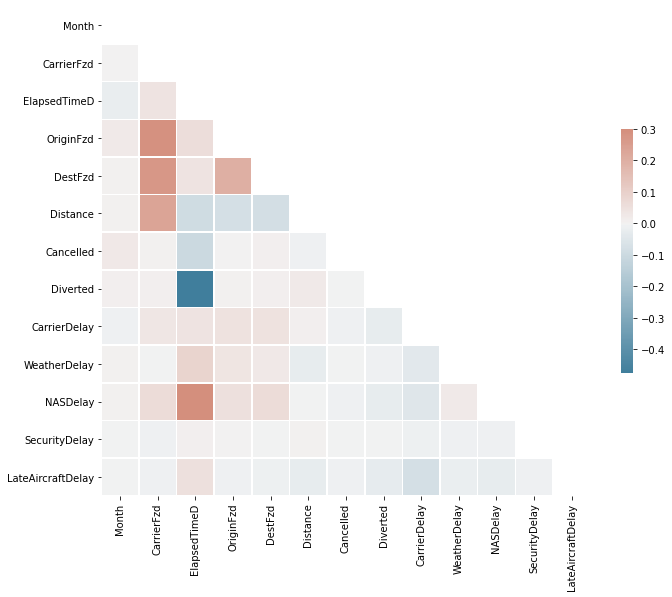

In [18]:
corr = delays.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Veiem q les variables q tenen un major impacte en els endarreriments dels vols són Origen, Destí , Distància, companyia, Elapsed Time D , una variable que hem creat abans i que correspon a la diferencia entre al durada estimada i la durada real del vol. 
Ara dividiré les dades , prenent com a variable objectiu Elapsed Time D i la resta com a variables de caracteristiques 

In [10]:
from sklearn.model_selection import train_test_split


y= delays.ElapsedTimeD

delays_features = ['OriginFzd', 'DestFzd','Cancelled','Diverted','CarrierDelay',
           'WeatherDelay', 'NASDelay','Distance', 'SecurityDelay','LateAircraftDelay','CarrierFzd']

X =delays[delays_features]
X.describe() 


,OriginFzd,DestFzd,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,Distance,SecurityDelay,LateAircraftDelay,CarrierFzd
count,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06
mean,6.565117e+01,6.567086e+01,3.268348e-04,4.003598e-03,1.235367e+01,2.385512e+00,9.675607e+00,7.656862e+02,5.805836e-02,1.629374e+01,7.560402e+00
std,4.795150e+01,5.121993e+01,1.807562e-02,6.314722e-02,3.613493e+01,1.734036e+01,2.808958e+01,5.744797e+02,1.623934e+00,3.585904e+01,6.151404e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.380000e+02,0.000000e+00,0.000000e+00,2.000000e+00
50%,6.000000e+01,5.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.060000e+02,0.000000e+00,0.000000e+00,6.000000e+00
75%,9.300000e+01,9.500000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,6.000000e+00,9.980000e+02,0.000000e+00,1.800000e+01,1.300000e+01
max,3.020000e+02,3.030000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,4.962000e+03,3.920000e+02,1.316000e+03,1.900000e+01


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, train_size=0.30)


In [12]:
print('X_test: ', X_test.shape, 'X_train: ',X_train.shape)
print('y_test: ', y_test.shape, 'y_train: ',y_train.shape) 

X_test:  (1355731, 11) X_train:  (581027, 11)
y_test:  (1355731,) y_train:  (581027,)


Faré un model de ML per poder predir el ElapsedTimeD seguint els següents passos:  
- Definir el model
- Fit l'entrenaré
- Predir
- Avaluar 

Som-hi!  

he decidit probar primer amb el DecissionTreeRegressor, fent primer els càlculs amb totes les dades i comparant els resultats amb una porció de les dades. 

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Definir model: cal especificar el número random_state per aconseguir sempre el mateix resultat
delays_model = DecisionTreeRegressor(random_state=42)

# Fit model
delays_model.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [14]:
print("Farem les prediccions prenent els següents 5 vols:")
print(X.tail())

Farem les prediccions prenent els següents 5 vols:
         OriginFzd  DestFzd  Cancelled  Diverted  CarrierDelay  WeatherDelay  \
1936753         83       89          0         0           3.0           0.0   
1936754         92       89          0         0           0.0          57.0   
1936755        104       65          0         0           1.0           0.0   
1936756          0       89          0         0           0.0           0.0   
1936757         30       89          0         0           0.0           0.0   

         NASDelay  Distance  SecurityDelay  LateAircraftDelay  CarrierFzd  
1936753       0.0       906            0.0               22.0           7  
1936754      18.0       481            0.0                0.0           7  
1936755      19.0       689            0.0               79.0           7  
1936756       0.0       533            0.0                0.0           7  
1936757       0.0       874            0.0                0.0           7  


In [15]:
print('Les prediccions són:')
print(delays_model.predict(X.tail()))

Les prediccions són:
[-5.         18.         19.         -7.70114943 -8.65697674]


Calcul.lem l'error mitj de les prediccions

In [16]:
from sklearn.metrics import mean_absolute_error

predicted_delays = delays_model.predict(X)
mean_absolute_error(y, predicted_delays)

2.7222948756586853

Ens dóna un error de 2.72 minuts.

In [19]:
from sklearn.tree import DecisionTreeRegressor

# Definir model: cal especificar el número random_state per aconseguir sempre el mateix resultat
delays_model = DecisionTreeRegressor(random_state=42)

# Fit model
delays_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
print("Farem les prediccions prenent els següents 5 vols:")
print(X_train.tail())

Farem les prediccions prenent els següents 5 vols:
         OriginFzd  DestFzd  Cancelled  Diverted  CarrierDelay  WeatherDelay  \
259178          65      118          0         0           0.0           0.0   
1414414         14       65          0         0           0.0           0.0   
131932          58       30          0         0          51.0           0.0   
671155          93      126          0         0          48.0           0.0   
121958          65        1          0         0          20.0           0.0   

         NASDelay  Distance  SecurityDelay  LateAircraftDelay  CarrierFzd  
259178        0.0       867            0.0                0.0           5  
1414414      76.0       305            0.0                0.0          19  
131932        0.0      1979            0.0                0.0          13  
671155        0.0       624            0.0                0.0          12  
121958        0.0       622            0.0                0.0          12  


In [21]:
print('Les prediccions són:')
print(delays_model.predict(X_train.tail()))

Les prediccions són:
[-11.25581395 -10.         -15.          -8.          -7.        ]


In [22]:
predicted_delays = delays_model.predict(X_train)
mean_absolute_error(y_train, predicted_delays)

2.3124950453005257

L'error mig ha disminuït una mica, sent en aquest cas de <mark>2.31</mark> minuts.

Finalment probaré de fer-ho amb Rnadom forest, per comparar les dades:

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf_model = RandomForestRegressor(random_state=42)

In [24]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Calculate the mean absolute error of your Random Forest model on the test data
rf_test_predictions = rf_model.predict(X_test)
rf_test_mae = mean_absolute_error(rf_test_predictions, y_test)

In [26]:
print("Test MAE per Random Forest Model: {}".format(rf_test_mae))

Test MAE per Random Forest Model: 5.9427023309311355


En aquest cas L'error mig ha pujat més, sent en aquest cas de <mark>5.94</mark> minuts.Crecq ue aquest model no és tant acurat per aquest bloc de dades.
